BloomTech Data Science

*Unit 2, Sprint 1, Module 2*

---

In [64]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [66]:
def wrangle(filepath):
    df = pd.read_csv(filepath, parse_dates=['created'], index_col='created')
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]
    
    # Engineer features
    df['desc_len']  =  df['description'].str.len()
    df['dogs_cats'] = (df['dogs_allowed'] + df['cats_allowed'] == 2).astype(int)
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']
    
    
    #Drop rows with Nan values.
    df.dropna(inplace=True)
    
    return df.sort_index()

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [67]:
df = wrangle(filepath)

**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

In [68]:
# df['desc_len']  =  df['description'].str.len().head()
# df['dogs_cats'] = (df['dogs_allowed'] + df['cats_allowed'] == 2).astype(int)
# df['total_rooms'] = df['bedrooms'] + df['bathrooms']

In [69]:
# Conduct your exploratory data analysis here, 
# and then modify the function above.
df.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,...,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,desc_len,dogs_cats,total_rooms
created,,,,,,,,,,,,,,,,,,,,,
2016-04-01 22:12:41,1.0,1,X-LARGE Flex 1BR Loft! ~~ PRIME Greenwich Vill...,Astor Place,40.7302,-73.9924,3195,1 Astor Place,high,1,...,0,0,0,0,0,0,0,94.0,0,2.0
2016-04-01 22:56:00,1.0,0,"This Enormous Studio Features: Harwood Floors,...",East 54th Street,40.7576,-73.9677,2000,230 East 54th Street,medium,0,...,0,0,0,0,0,0,0,357.0,1,1.0
2016-04-01 22:57:15,2.0,3,--- East 31st St & Lexington Avenue --- This S...,East 31st St & Lexington Avenue,40.7388,-73.9851,5850,105 Lexington Avenue,high,1,...,0,0,0,0,0,0,1,411.0,1,5.0
2016-04-01 23:26:07,1.0,1,Reduced Fee!! Priced To Rent!\rLarge Newly Upd...,West End Ave,40.7939,-73.9738,2745,700 West End Ave,medium,1,...,0,0,0,0,0,0,1,816.0,1,2.0
2016-04-02 00:48:13,1.0,1,Phenomenal deal of the century!! This spacious...,E 88th street,40.7784,-73.9491,2400,401 E 88th street,medium,1,...,0,0,0,0,0,0,0,536.0,1,2.0


# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [70]:
target = "price"

X = df.select_dtypes('number').drop(columns = target)
y = df[target]

In [71]:
X.shape

(47260, 31)

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [72]:
cutoff = '2016-06-01'
mask = X.index < cutoff
X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

In [73]:
assert len(X_test) + len(X_train) == len(X)

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [74]:
y_train_pred  = [y_train.mean()] * len(y_train)
baseline_mae = mean_absolute_error(y_train, y_train_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 1202.3983007818476


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [75]:
# Step 1: Import predictor class


# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X_train,y_train)

LinearRegression()

# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [76]:
#y_train_pred  = [y_train.mean()] * len(y_train)
training_mae = mean_absolute_error(y_train, model.predict(X_train))

#y_test_pred  = [y_test.mean()] * len(y_test)
test_mae = mean_absolute_error(y_test, model.predict(X_test))

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 692.5825870871353
Test MAE: 701.1773006806743


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [80]:

training_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 0.6164320027205014
Test MAE: 0.6261548870791147


# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

In [85]:
coefficients = model.coef_
features = X_train.columns

In [88]:
pd.Series(coefficients, index=features).sort_values(key=abs).tail(3)

bathrooms     1016.088304
latitude      1627.683419
longitude   -13591.234455
dtype: float64

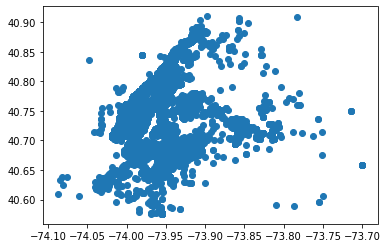

In [91]:
plt.scatter(X_train['longitude'], X_train['latitude']);